In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# warnings.filterwarnings('default')

In [16]:
df = pd.read_csv('titanic.csv')

In [17]:
df.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['age'].fillna(df['age'].median(), inplace=True) 
df['fare'].fillna(df['fare'].median(), inplace=True)

In [20]:
X = df.drop('survived', axis=1)
y = df['survived'] 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
svc_model = SVC(kernel='linear')

In [23]:
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"الدقة:{ accuracy}")
print(f"conf_matrix:\n{conf_matrix}")

الدقة:0.7910447761194029
conf_matrix:
[[134  23]
 [ 33  78]]


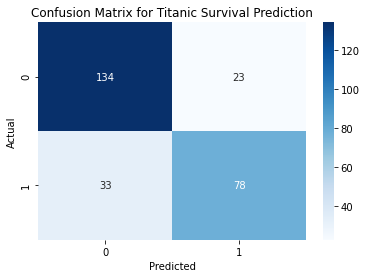

In [26]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Titanic Survival Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
new_passenger = [[3, 1, 22, 1, 0, 7.25]]  
precision = svc_model.predict(new_passenger)  
print(f'توقع الراكب الجديد: {"احتمال يعيش" if precision[0] == 1 else "احتمال يموت"}')

توقع الراكب الجديد: احتمال يعيش
